In [141]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# Figure 1 panel a)

In [142]:
def Value_period_1(beta, R, y, delta, M,retired=False):
    
    v_retire = np.log(M/(1+beta)) + beta * np.log(R*(M - (M/(1+beta))))

    if retired is False:
        v_work = np.log((M + y/R)/ (1+ beta)) + beta * np.log(R*(M - ((M + y/R)/ (1+ beta))) + y) - delta
        x = np.maximum(v_work, v_retire)

        return x
    else:
        return v_retire

    
def Value_period_2(beta, R, y, delta, M, c):
    v_work_value_1 = Value_period_1(beta, R, y, delta, M-c + y) 
    
    v_work = np.log(c) + beta * v_work_value_1 - delta
    
    return v_work
    


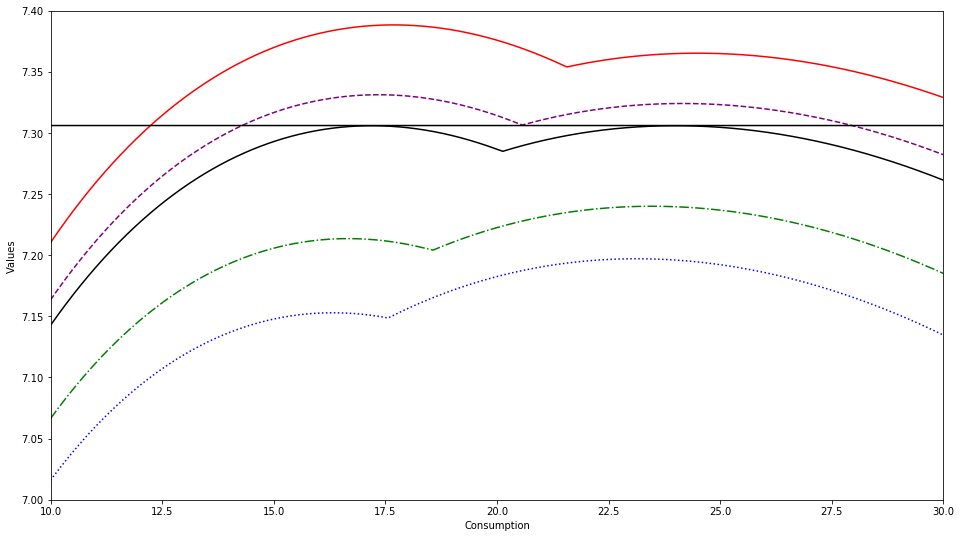

In [153]:
beta = 0.98
R = 1
y = 20
delta = 1
c = np.arange(10, 30, 0.0001)

Values = {}
for M in [28, 29, 30.5626, 31, 32]:
    Values[M] = []
    for element in c:
        Values[M] += [Value_period_2(0.98, 1, 20, 1, M, element)]

Values[1] = [7.306] * len(Values[28])
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel("Values")
ax.set_xlabel("Consumption")
ax.set_ylim(7, 7.4)
ax.set_xlim(10, 30)

plt.plot(c, Values[28], linestyle=':', color='blue')
plt.plot(c, Values[29], linestyle='-.', color='green')
plt.plot(c, Values[30.5626], color='black')
plt.plot(c, Values[31], linestyle='--', color='purple')
plt.plot(c, Values[32], color='red')
plt.plot(c, Values[1], color='black')



# Plot Value functions for both choices in period t-1

In [159]:
def value_function_work(beta, R, y, delta, M, c):
    v_work = np.log(c) + beta * np.log(R*(M - c) + y) - delta
    return v_work
def value_function_retire(beta, R, y, delta, M, c):
    v_retire = np.log(c) + beta * np.log(R*(M - c)) 
    return v_retire

In [188]:
beta = 0.98
R = 1
y = 20
delta = 1
c = np.arange(1, 38, 0.0001)
M = 38

aux_dict = {'retire': [], 'work': []}

for i in c:
    aux_dict['work'] += [value_function_work(beta, R, y, delta, M, i)]
    aux_dict['retire'] += [value_function_retire(beta, R, y, delta, M, i)]

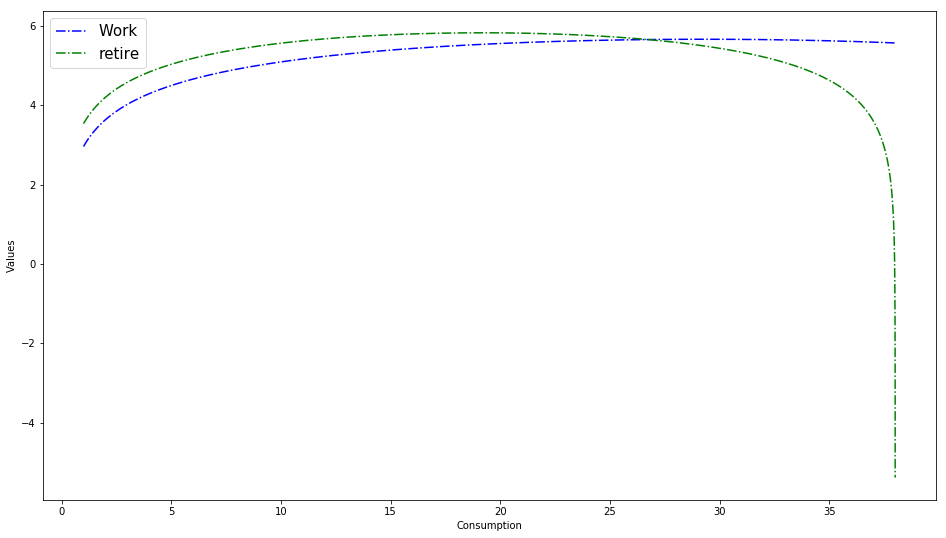

In [189]:
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel("Values")
ax.set_xlabel("Consumption")
plt.plot(c, aux_dict['work'], linestyle='-.', color='blue', label='Work')
plt.plot(c, aux_dict['retire'], linestyle='-.', color='green', label = 'retire')
plt.legend(prop={'size': 15})
